In [2]:
import os
import bokeh
from bokeh.plotting import show
import pandas as pd
import numpy as np
import torch

import flowkit as fk
import seaborn as sns
import matplotlib.pyplot as plt

bokeh.io.output_notebook()

Loading BokehJS ...

In [3]:
#load in patient dataset
flow_data = pd.read_csv("flow_data.csv")
flow_data

,Subject Accession,H1,H3,B,FCS Raw,FCS Preprocessed,WSP File
0,SUB120420,64,16,16,Panel_L1_A1_L1_110194_PBMC_10112011_A01.580227...,export_Panel_L1_A1_L1_110194_PBMC_10112011_A01...,Panel_L1_Run_2.804556.wsp
1,SUB120423,256,16,16,Panel_L1_A2_L1_110197_PBMC_10112011_A02.579447...,export_Panel_L1_A2_L1_110197_PBMC_10112011_A02...,Panel_L1_Run_1.804538.wsp
2,SUB120445,64,8,32,Panel_L1_A3_L1_110243_PBMC_10172011_A03.578999...,export_Panel_L1_A3_L1_110243_PBMC_10172011_A03...,Panel_L1_Run_4.804574.wsp
3,SUB120446,1024,256,64,Panel_L1_A1_L1_110244_PBMC_10172011_A01.579604...,export_Panel_L1_A1_L1_110244_PBMC_10172011_A01...,Panel_L1_Run_5.804583.wsp
4,SUB120449,1024,128,64,Panel_L1_E3_L1_110247_PBMC_10172011_E03.580335...,export_Panel_L1_E3_L1_110247_PBMC_10172011_E03...,Panel_L1_Run_4.804574.wsp
5,SUB120450,64,32,16,Panel_L1_E1_L1_110248_PBMC_10172011_E01.578572...,export_Panel_L1_E1_L1_110248_PBMC_10172011_E01...,Panel_L1_Run_5.804583.wsp
6,SUB120452,128,128,128,Panel_L1_A2_L1_110250_PBMC_10172011_A02.579307...,export_Panel_L1_A2_L1_110250_PBMC_10172011_A02...,Panel_L1_Run_5.804583.wsp
7,SUB120457,128,128,32,Panel_L1_E2_L1_110255_PBMC_10172011_E02.580138...,export_Panel_L1_E2_L1_110255_PBMC_10172011_E02...,Panel_L1_Run_5.804583.wsp
8,SUB120458,256,64,32,Panel_L1_A3_L1_110256_PBMC_10172011_A03.579670...,export_Panel_L1_A3_L1_110256_PBMC_10172011_A03...,Panel_L1_Run_5.804583.wsp
9,SUB120459,128,32,64,Panel_L1_A1_L1_110257_PBMC_10172011_A01.580299...,export_Panel_L1_A1_L1_110257_PBMC_10172011_A01...,Panel_L1_Run_6.804592.wsp


In [4]:
cytof_data = pd.read_csv("cytof_data.csv")
cytof_data

,Subject Accession,H1,H3,B,FCS Raw,FCS Preprocessed
0,SUB116519,640,640,160,083012-Mike-Study 15-2011-V1-15103_cells_found...,083012-Mike-Study 15-2011-V1-15103_cells_found...
1,SUB116523,40,160,80,083012-Mike-Study 15-2011-V1-15107_cells_found...,083012-Mike-Study 15-2011-V1-15107_cells_found...
2,SUB116524,160,40,320,083012-Mike-Study 15-2011-V1-15108_cells_found...,083012-Mike-Study 15-2011-V1-15108_cells_found...
3,SUB116525,80,320,160,083012-Mike-Study 15-2011-V1-15109_cells_found...,083012-Mike-Study 15-2011-V1-15109_cells_found...
4,SUB116526,20,160,20,083012-Mike-Study 15-2011-V1-15110_cells_found...,083012-Mike-Study 15-2011-V1-15110_cells_found...
5,SUB116527,320,80,160,083012-Mike-Study 15-2011-V1-15111_cells_found...,083012-Mike-Study 15-2011-V1-15111_cells_found...
6,SUB116528,160,160,320,083012-Mike-Study 15-2011-V1-15112_cells_found...,083012-Mike-Study 15-2011-V1-15112_cells_found...
7,SUB116529,80,320,320,083012-Mike-Study 15-2011-V1-15113_cells_found...,083012-Mike-Study 15-2011-V1-15113_cells_found...
8,SUB116530,160,80,160,083012-Mike-Study 15-2011-V1-15114_cells_found...,083012-Mike-Study 15-2011-V1-15114_cells_found...
9,SUB116531,160,320,160,083012-Mike-Study 15-2011-V1-15115_cells_found...,083012-Mike-Study 15-2011-V1-15115_cells_found...


In [5]:
#Sample Extraction Function
def extractFCSDF(fileName, set, source = "Raw"):
    #Set: CyTOF or Flow
    path = ""
    if source == "Preprocessed":
        path = os.path.join("FCS", set, "Preprocessed", fileName)
    else:
        path = os.path.join("FCS", set, "Raw", fileName)
    sample = fk.Sample(path)
    return sample.as_dataframe(source = "raw")

In [20]:
print(extractFCSDF(flow_data.iloc[0, 5], "Flow", "Preprocessed").columns)
print(extractFCSDF(cytof_data.iloc[0, 5], "CyTOF", "Preprocessed").columns)

MultiIndex([(                         'FSC-A',          ''),
            (                         'FSC-H',          ''),
            (                         'FSC-W',          ''),
            (                         'SSC-A',          ''),
            (                         'SSC-H',          ''),
            (                         'SSC-W',          ''),
            (                  'FJComp-APC-A',      'CD38'),
            (              'FJComp-APC-Cy7-A',       'CD8'),
            (      'FJComp-Alexa Fluor 700-A',      'CD28'),
            (                 'FJComp-FITC-A',      'CD27'),
            ('FJComp-Live Dead Fixable Red-A', 'Viability'),
            (                   'FJComp-PE-A',      'CCR7'),
            (               'FJComp-PE-Cy7-A',    'CD45RA'),
            (          'FJComp-PerCP-Cy5-5-A',       'CD4'),
            (                 'FJComp-V450-A',       'CD3'),
            (                 'FJComp-V500-A',    'HLA-DR'),
            (           

Epoch 1/12: Train Loss = 67229.5829, Val Loss = 114573.3109
Epoch 2/12: Train Loss = 52515.3258, Val Loss = 83431.0201
Epoch 3/12: Train Loss = 41933.1016, Val Loss = 69661.6775
Epoch 4/12: Train Loss = 37485.0119, Val Loss = 73996.5392
Epoch 5/12: Train Loss = 37695.4547, Val Loss = 70846.7354
Epoch 6/12: Train Loss = 41152.9270, Val Loss = 79281.1669
Epoch 7/12: Train Loss = 35520.2985, Val Loss = 67759.1489
Epoch 8/12: Train Loss = 37969.9983, Val Loss = 71694.2532
Epoch 9/12: Train Loss = 38379.4924, Val Loss = 69960.7766
Epoch 10/12: Train Loss = 36856.7438, Val Loss = 73522.9209
Epoch 11/12: Train Loss = 36429.9733, Val Loss = 69007.6714
Epoch 12/12: Train Loss = 39651.4810, Val Loss = 72093.4617


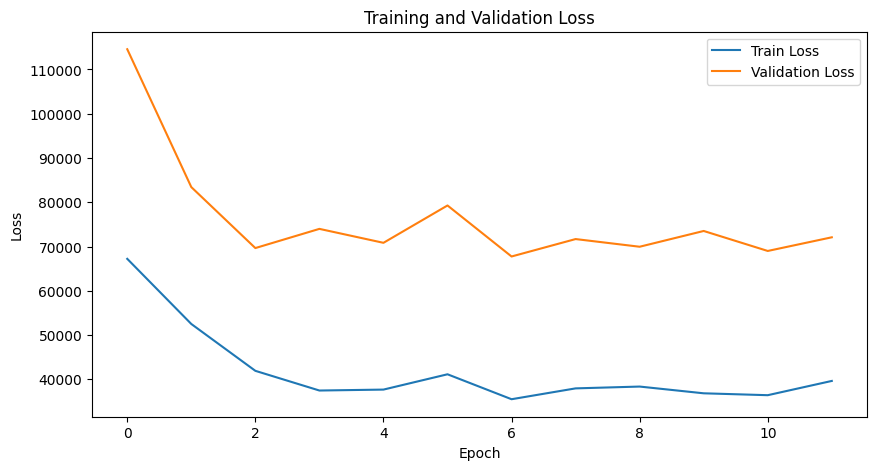

In [96]:
from model import HAITiterPredictor
import torch.optim as optim
import torch.nn as nn

dropped = [
  ('Time',''),
]

all_cells = []
num_markers = 0

# get all cells from subjects and place in all_cells
for index, row in flow_data.iterrows():
  subject_data = extractFCSDF(row["FCS Preprocessed"], "Flow", source = "Preprocessed")
  subject_data = subject_data.drop(columns = dropped)
  subject_data = pd.DataFrame(subject_data.values, columns = [x[1] for x in subject_data.columns])
  all_cells.append(subject_data)
  num_markers = len(subject_data.columns)

# initialize the model
model = HAITiterPredictor(num_markers=num_markers)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

history = {
  'train_loss': [],
  'val_loss': [],
  'val_r2': []
}

train_range = int(len(all_cells)*0.8)
train_cells = all_cells[:train_range]
val_cells = all_cells[train_range:]

num_epochs = 12

# start training
for epoch in range(num_epochs):
  # train phase
  model.train()
  train_loss = 0.0
  train_order = np.random.permutation(len(train_cells))
  for i in train_order:
    all_cells = train_cells[i].values
    cell_picks = np.random.choice(all_cells.shape[0], 16000, replace=False)
    cells = torch.tensor(all_cells[cell_picks], dtype=torch.float32).to(device)
    cells = cells.unsqueeze(0).expand(8, -1, -1) # for batch size of 8
    titers = torch.tensor(flow_data[['H1', 'H3', 'B']].iloc[i].values, dtype=torch.float32).to(device)
    titers = titers.unsqueeze(0).expand(8, -1) # for batch size of 8
    # forward pass
    predictions = model(cells)
    loss = criterion(predictions, titers)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss += loss.item()
  
  train_loss /= len(train_cells)
  history['train_loss'].append(train_loss)

  # validation phase
  model.eval()
  val_loss = 0.0
  all_preds = []
  all_targets = []
  with torch.no_grad():
    for i in range(len(val_cells)):
      all_cells = val_cells[i].values
      cell_picks = np.random.choice(all_cells.shape[0], 16000, replace=False)
      cells = torch.tensor(all_cells[cell_picks], dtype=torch.float32).to(device)
      cells = cells.unsqueeze(0).expand(8, -1, -1) # for batch size of 8
      titers = torch.tensor(flow_data[['H1', 'H3', 'B']].iloc[train_range+i].values, dtype=torch.float32).to(device)
      titers = titers.unsqueeze(0).expand(8, -1) # for batch size of 8
      predictions = model(cells)
      loss = criterion(predictions, titers)
      val_loss += loss.item()

      all_preds.append(predictions.cpu().numpy())
      all_targets.append(titers.cpu().numpy())
  
  val_loss /= len(val_cells)
  history['val_loss'].append(val_loss)
  
  all_preds = np.vstack(all_preds)
  all_targets = np.vstack(all_targets)
  
  scheduler.step(val_loss)
  
  print(f"Epoch {epoch+1}/{num_epochs}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

# Save model
torch.save(model.state_dict(), "hai_titer_model.pth")

# plot loss
plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.savefig('training_history.png')
plt.show()



In [97]:
# Get data for first subject
first_subject_data = extractFCSDF(flow_data.iloc[0, 5], "Flow", "Preprocessed")
first_subject_data = first_subject_data.drop(columns=dropped)
first_subject_data = pd.DataFrame(first_subject_data.values, columns=[x[1] for x in first_subject_data.columns])

# Sample 2000 cells randomly
cell_picks = np.random.choice(first_subject_data.shape[0], 2000, replace=False)
cells = torch.tensor(first_subject_data.values[cell_picks], dtype=torch.float32).to(device)
cells = cells.unsqueeze(0)

# Get predictions
model.eval()
with torch.no_grad():
  predictions = model(cells)
  
# Average predictions across batch
mean_predictions = predictions.mean(dim=0).cpu().numpy()

print("Predicted HAI titers (H1, H3, B):", mean_predictions)
print("Actual HAI titers (H1, H3, B):", flow_data.iloc[0][['H1', 'H3', 'B']].values)

Predicted HAI titers (H1, H3, B): [268.80527   60.26269   64.067345]
Actual HAI titers (H1, H3, B): [64 16 16]
